In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=["Date"], index_col="Date")
df.reset_index(inplace=True)
df

C:\Users\villemaj\AppData\Local\Temp\ipykernel_25712\2276833968.py:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\villemaj\OneDrive - Oulun ammattikorkeakoulu\Data Analysis\Test data\openpowerlifting-2023-08-12\openpowerlifting-2023-08-12-9f1b3427.csv", parse_dates=["Date"], index_col="Date")


,Date,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,...,Goodlift,Tested,Country,State,Federation,ParentFederation,MeetCountry,MeetState,MeetTown,MeetName
0,2019-05-11,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,...,57.10,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
1,2019-05-11,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,...,56.76,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
2,2019-05-11,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,...,41.24,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
3,2019-05-11,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,...,66.68,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
4,2019-05-11,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,...,39.34,Yes,Russia,NaN,GFP,NaN,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956811,2016-11-14,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,...,93.16,Yes,Ukraine,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956812,2016-11-14,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,...,90.57,Yes,Hungary,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956813,2016-11-14,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,...,88.89,Yes,Netherlands,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships
2956814,2016-11-14,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,...,72.24,Yes,England,NaN,IPF,IPF,USA,NaN,Orlando,World Open Championships


In [2]:
df.columns

Index(['Date', 'Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'],
      dtype='object')

t-statistics = 102.1408040375788
p-value = 0.0
difference of mean values = 263.3124736594122 kg
We reject the null hypothesis. There is significant difference between the means of the two groups.


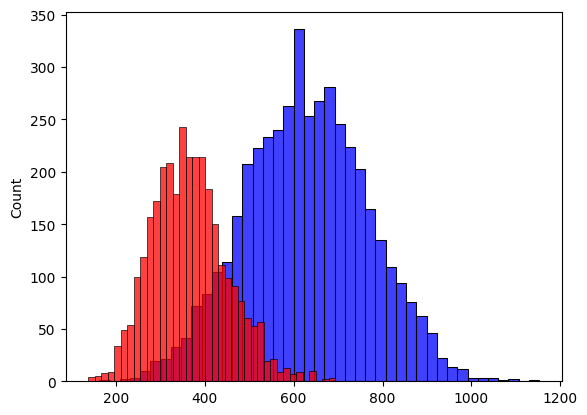

In [8]:
#hypothesis 1: men lift more than women, compare men and women groups
#use TotalKg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#dictionary which contains the data values and test results, key is the name of the test
results = dict()

#two sample datasets as lists

sample1 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()
sample2 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')].dropna().to_list()

#plot the data
sns.histplot(sample1, color='blue')
sns.histplot(sample2, color='red')

t, p = stats.ttest_ind(sample1, sample2, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample1) - np.mean(sample2)) + ' kg')

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

#add the results to the dictionary
results.update({'Hypothesis 1': {'t-test':[t, p], 'samples data':[sample1, sample2]}})

t-statistics = 18.54093116727736
p-value = 1.0780016538217974e-36
difference of mean values = 187.19879518072287 kg
number of samples: 50 and 83
We reject the null hypothesis. There is significant difference between the means of the two groups.


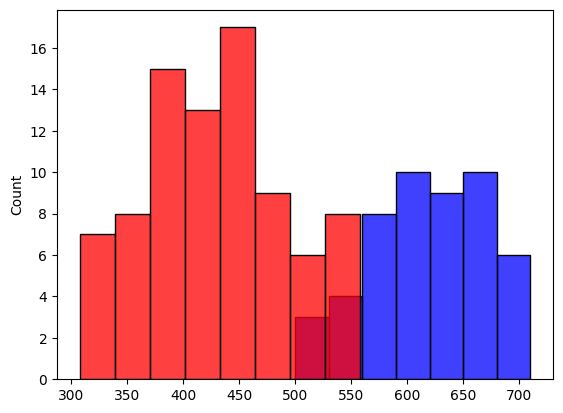

In [9]:
#hypothesis 1: men lift more than women, compare men and women groups, use same age groups and weight groups
#use TotalKg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#two sample datasets as lists

sample1 = df['TotalKg'].loc[(df['Sex'] == 'M') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF') &
                            (df['Age'] < 30) & (df['Age'] > 25) &
                            (df['BodyweightKg'] < 70) & (df['BodyweightKg'] > 60)].dropna().to_list()

sample2 = df['TotalKg'].loc[(df['Sex'] == 'F') & (df['Event'] == 'SBD') &
                            (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF') &
                            (df['Age'] < 30) & (df['Age'] > 25) &
                            (df['BodyweightKg'] < 70) & (df['BodyweightKg'] > 60)].dropna().to_list()

#plot the data
sns.histplot(sample1, color='blue')
sns.histplot(sample2, color='red')

t, p = stats.ttest_ind(sample1, sample2, equal_var=False)
print("t-statistics = " + str(t))
print("p-value = " + str(p))
print("difference of mean values = " + str(np.mean(sample1) - np.mean(sample2)) + ' kg')
print("number of samples: " + str(len(sample1)) + " and " + str(len(sample2)))

#conclusion of t-test: p-value is less than 0.05, so we reject the null hypothesis
if p < 0.05:
    print("We reject the null hypothesis. There is significant difference between the means of the two groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the means of the two groups.")

results.update({'Hypothesis 2': {'t-test':[t, p], 'samples data':[sample1, sample2]}})

In [10]:
results

{'Hypothesis 1': {'t-test': [102.1408040375788, 0.0],
  'samples data': [[567.5,
    535.0,
    497.5,
    567.5,
    577.5,
    445.0,
    570.0,
    545.0,
    645.0,
    895.5,
    747.5,
    660.0,
    760.0,
    742.5,
    572.5,
    540.0,
    710.0,
    635.0,
    810.0,
    785.0,
    732.5,
    680.0,
    912.5,
    885.0,
    492.5,
    492.5,
    240.0,
    565.0,
    552.5,
    515.0,
    512.5,
    487.5,
    475.0,
    470.0,
    677.5,
    625.0,
    600.0,
    590.0,
    537.5,
    512.5,
    420.0,
    683.5,
    683.5,
    637.5,
    632.5,
    595.0,
    577.5,
    565.0,
    742.5,
    742.5,
    677.5,
    672.5,
    650.0,
    645.0,
    637.5,
    615.0,
    830.0,
    800.0,
    745.0,
    715.0,
    565.0,
    545.0,
    830.0,
    825.0,
    740.0,
    730.0,
    720.0,
    652.5,
    860.5,
    770.0,
    690.0,
    477.5,
    425.0,
    390.0,
    535.0,
    535.0,
    520.0,
    565.5,
    525.0,
    492.5,
    442.5,
    650.5,
    617.5,
    572.5,
    57

In [19]:
from dash import Dash, html, dcc, callback, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Powerlifting data analysis", style={'textAlign': 'center'}),
    dcc.Dropdown(list(results.keys()), 'Hypothesis 1', id='dropdown1'),
    dcc.Graph(id='graph1')
    ])

@app.callback(Output('graph1', 'figure'), Input('dropdown1', 'value'))

def update_graph(selected_dropdown_value):
    dict_res = results[selected_dropdown_value]
    df_data = pd.DataFrame(dict_res['samples data']).transpose() #rows to columns
    #add t-test results to the figure title
    df_t_test = pd.DataFrame(dict_res['t-test']).transpose() #rows to columns
    print(df_t_test)
    g = px.histogram(df_data, x=df_data.columns, barmode='overlay', color_discrete_sequence=['blue', 'red'])
    g.update_layout(title_text="t-statistics = " + str(df_t_test[0][0]))# + ", p-value = " + str(df_t_test[0][1]))
    
    return g

app.run_server(debug=True)


            0    1
0  102.140804  0.0
            0    1
0  102.140804  0.0
            0    1
0  102.140804  0.0
           0             1
0  18.540931  1.078002e-36
            0    1
0  102.140804  0.0
